# Titanic Dataset
The Titanic dataset provides information about the passengers onboard the RMS Titanic, a British passenger liner that sank in the North Atlantic Ocean on April 15, 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City. 

### The dataset is summarized according to the following variables:
- Economic status (class)
- Sex
- Age
- Survival status

The dataset is used to predict whether a passenger on the Titanic would have survived the disaster based on these features.
The Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. It was built by the Harland and Wolff shipyard in Belfast, and its architect, Thomas Andrews, died in the disaster.

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [218]:
sns.reset_defaults()
sns.set_palette("Set1")

In [219]:
# load data
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [220]:
data = data.drop(["class","alive",'embarked'],axis=1)
data = data.dropna(subset=['embark_town'])

In [221]:
data["sex"] = data["sex"].apply(lambda x: 1 if x == "male" else 0)
data["adult_male"] = data["adult_male"].apply(lambda x: 1 if x == True else 0)
data['alone'] = data['alone'].apply(lambda x: 1 if x == True else 0)
embarked_dict = {
    "Southampton": 1,
    "Cherbourg": 2,
    "Queenstown": 3,
}
data['embark_town'] = data["embark_town"].apply(lambda x: embarked_dict[x])



data

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,man,1,NaN,1,0
1,1,1,0,38.0,1,0,71.2833,woman,0,C,2,0
2,1,3,0,26.0,0,0,7.9250,woman,0,NaN,1,1
3,1,1,0,35.0,1,0,53.1000,woman,0,C,1,0
4,0,3,1,35.0,0,0,8.0500,man,1,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,man,1,NaN,1,1
887,1,1,0,19.0,0,0,30.0000,woman,0,B,1,1
888,0,3,0,NaN,1,2,23.4500,woman,0,NaN,1,0
889,1,1,1,26.0,0,0,30.0000,man,1,C,2,1


# 1. Statistical Numbers

In [222]:
data.describe()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,0.604049,1.362205,0.601800
std,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,49.697504,0.489329,0.636157,0.489803
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,1.000000


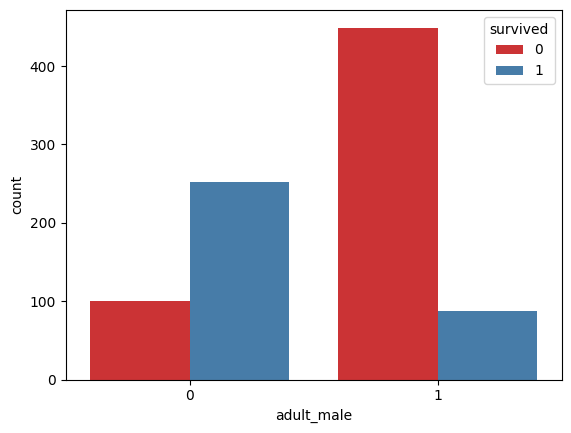

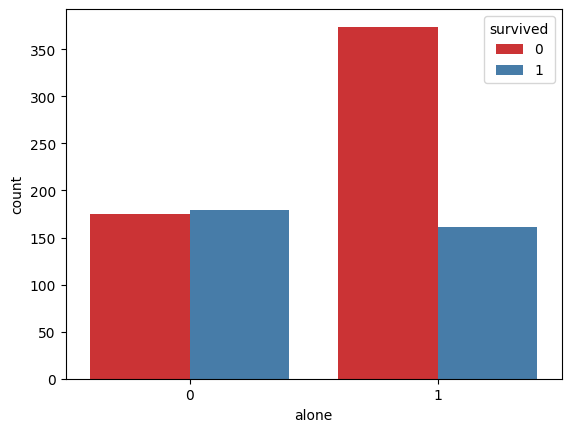

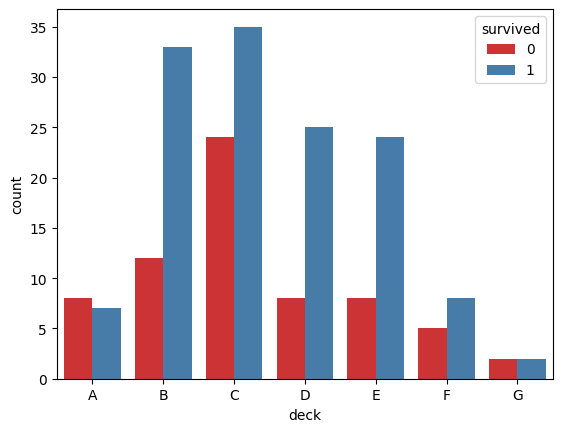

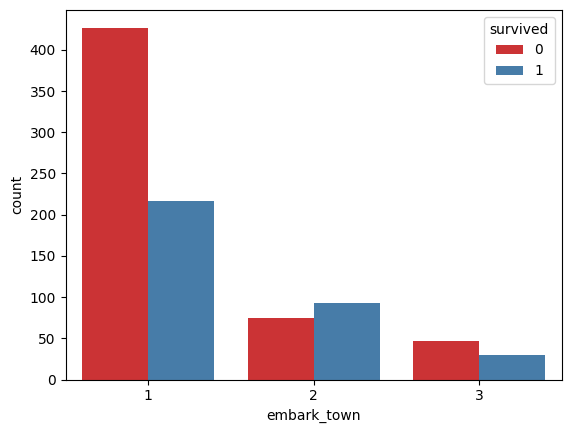

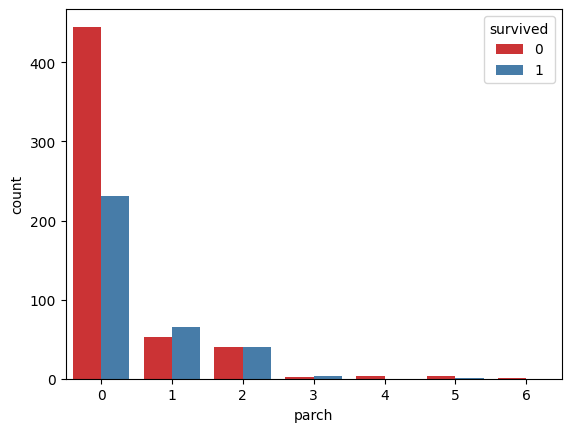

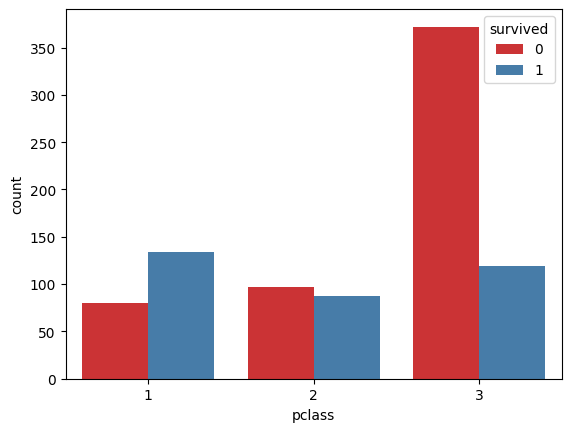

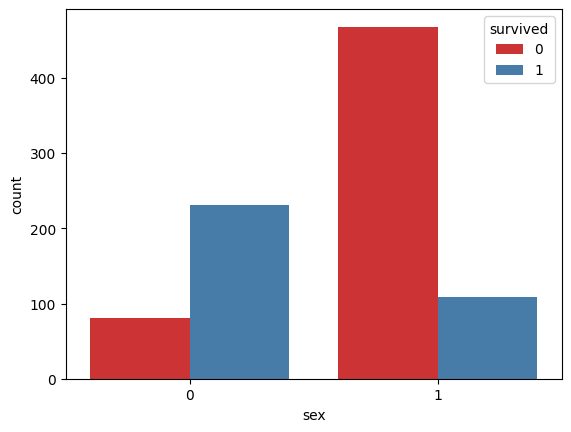

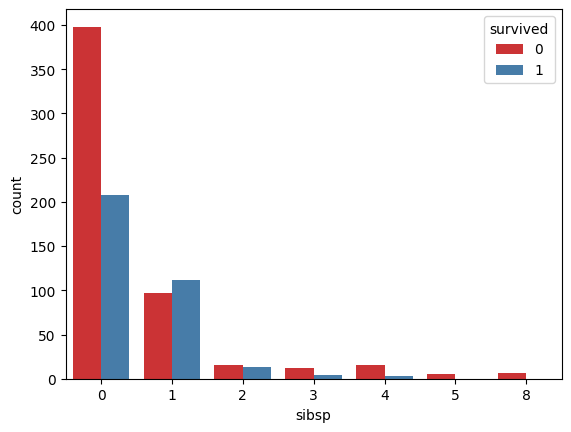

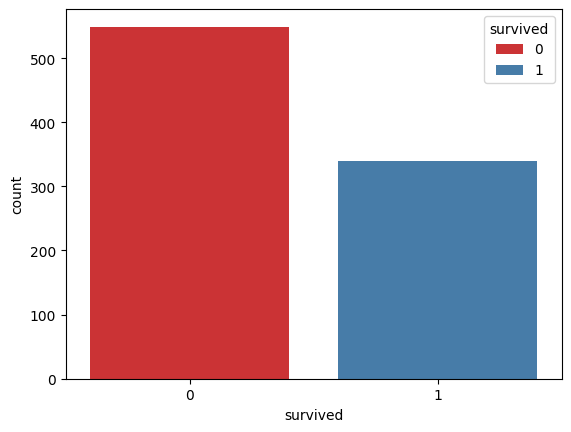

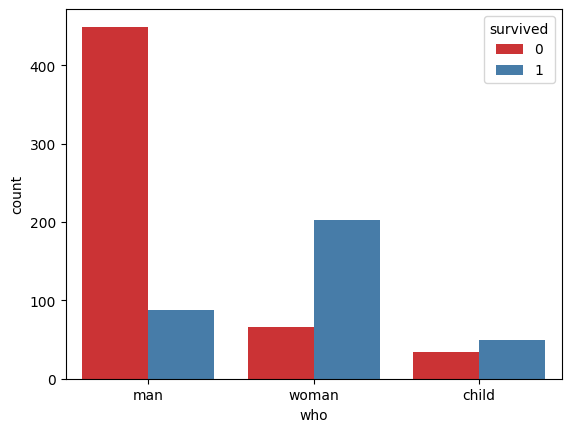

In [223]:
category_columns = data.columns.difference(["age","fare"])
for category in category_columns:
    sns.countplot(data=data,x=category,hue="survived")
    plt.show()

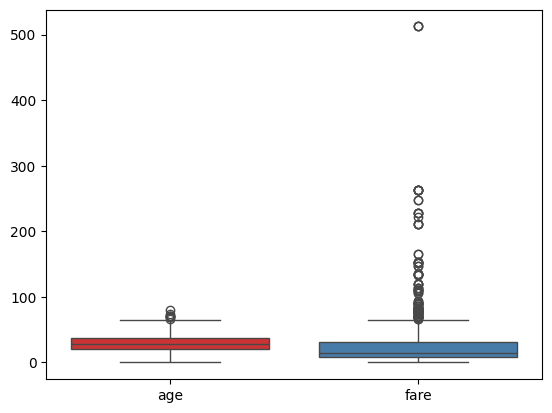

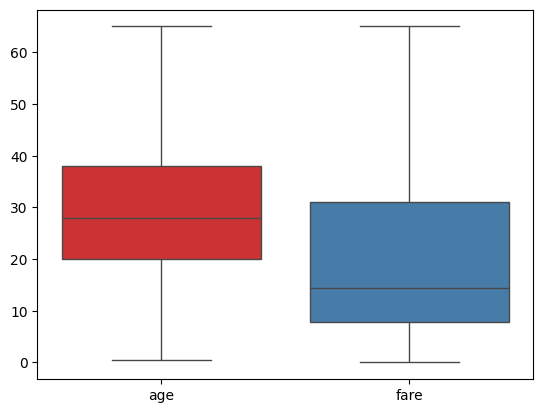

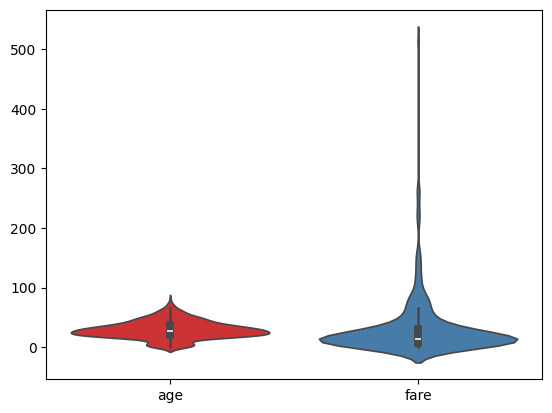

In [224]:
sns.boxplot(
    data=data[["age","fare"]]
)
plt.show()
sns.boxplot(
    data=data[["age","fare"]],
    showfliers=False
)
plt.show()
sns.violinplot(
    data=data[["age","fare"]]
)
plt.show()

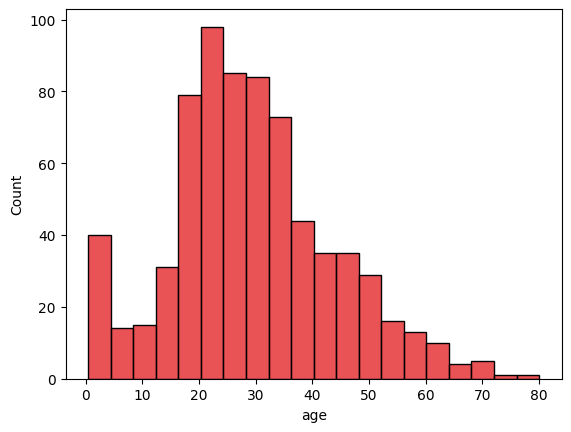

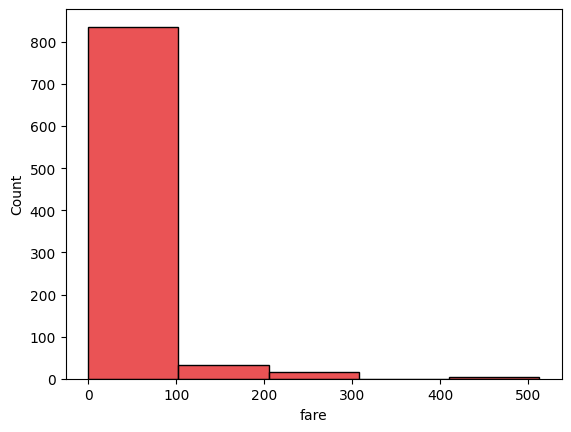

In [225]:
sns.histplot(data=data,x="age")
plt.show()
sns.histplot(data=data["fare"],bins=5)
plt.show()

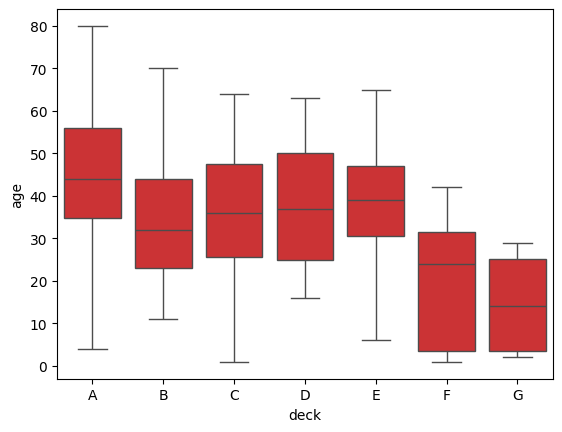

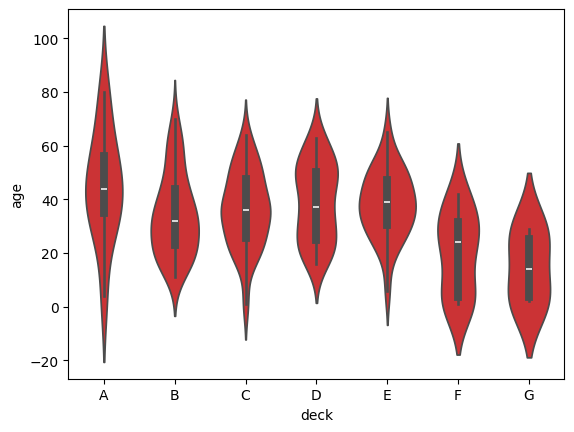

In [226]:
sns.boxplot(data,x="deck",y="age")
plt.show()
sns.violinplot(data,x="deck",y="age")
plt.show()